Importing required libraries.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

1) Loading, priniting dimensions, and displaying our target image, and patch images from the drive.

In [2]:
#imgCircle=cv2.imread("circle.jpg")
imgCircle=cv2.imread("house.jpg")
imgBuild=cv2.imread("buildings.jpg")
imgHouse=cv2.imread("house.jpg")
imgRSide=cv2.imread("road-side.jpg")
imgTable=cv2.imread("table.PNG")

In [3]:
imgGrayBuild = cv2.cvtColor(imgBuild, cv2.COLOR_BGR2GRAY)
imgGrayCircle = cv2.cvtColor(imgCircle, cv2.COLOR_BGR2GRAY)
imgGrayHouse = cv2.cvtColor(imgHouse, cv2.COLOR_BGR2GRAY)
imgGrayRSide = cv2.cvtColor(imgRSide, cv2.COLOR_BGR2GRAY)
imgGrayTable = cv2.cvtColor(imgTable, cv2.COLOR_BGR2GRAY)

(338, 401, 3)
(528, 612, 3)
(528, 612, 3)
(564, 846, 3)
(219, 375, 3)


<Figure size 432x288 with 0 Axes>

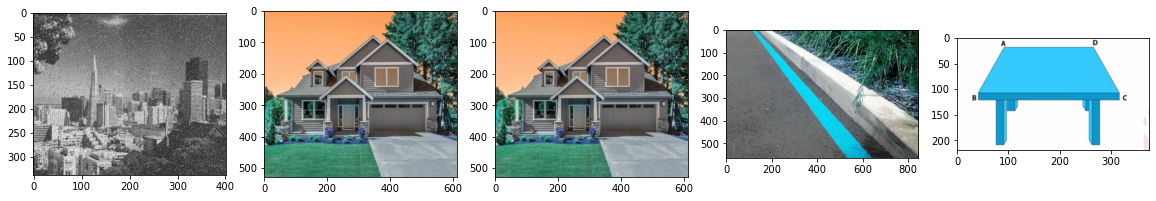

In [4]:
print(imgBuild.shape)
print(imgCircle.shape)
print(imgHouse.shape)
print(imgRSide.shape)
print(imgTable.shape)
plt.figure()
fig = plt.figure(figsize=(20, 20))
fig.add_subplot(1, 5, 1)
plt.imshow(imgBuild)
fig.add_subplot(1, 5, 2)
plt.imshow(imgCircle)
fig.add_subplot(1, 5, 3)
plt.imshow(imgHouse)
fig.add_subplot(1, 5, 4)
plt.imshow(imgRSide)
fig.add_subplot(1, 5, 5)
plt.imshow(imgTable)
plt.show()

In [5]:
sigma=0.5
T=0.3

In [6]:
def findFilterXYDerivative(filter_size, sigma):
    sHalf = round((-2*math.log(T)*(sigma**2))**(1/2))
    print(sHalf)
    N= 2*sHalf+1
    return np.meshgrid (np.linspace(-sHalf, sHalf, N), np.linspace(-sHalf , sHalf,N))

In [7]:
def findFlip2D(imgFilt):
    output=np.zeros([imgFilt.shape[0],imgFilt.shape[1]])
    for y in range(0,imgFilt.shape[0]):
        for x in range(0,imgFilt.shape[1]):
            output[y,x]=imgFilt[imgFilt.shape[0]-y-1,imgFilt.shape[1]-x-1]
    return output

In [8]:
[fx,fy]=findFilterXYDerivative (T, sigma)

1


In [9]:
print(fx)
print("\n")
print(fy)

[[-1.  0.  1.]
 [-1.  0.  1.]
 [-1.  0.  1.]]


[[-1. -1. -1.]
 [ 0.  0.  0.]
 [ 1.  1.  1.]]


In [10]:
def findGaussian(N, sigma):
    x, y = np.mgrid[-N//2 + 1:N//2 + 1, -N//2 + 1:N//2 + 1]
    g = np.exp(-((x**2 + y**2)/(2.0*sigma**2)))
    return g/g.sum()

In [11]:
G=findGaussian(3,sigma)
print(G)

[[0.01134374 0.08381951 0.01134374]
 [0.08381951 0.61934703 0.08381951]
 [0.01134374 0.08381951 0.01134374]]


In [12]:
def findDotProduct(imgFilt,imgPatch):
    if(imgFilt.shape==imgPatch.shape):
        return sum(sum(imgFilt*imgPatch))
    else:
        print("Dimensions of given inputs do not match.")
        print(imgFilt.shape)
        print(imgPatch.shape)
        return

In [13]:
def findConvolution2D(imgFiltr,imgTarget):
    
    if (imgTarget.shape[0]-imgFiltr.shape[0]>-1)and(imgTarget.shape[1]-imgFiltr.shape[1]>-1):
        imgFilt=findFlip2D(imgFiltr)
        output=np.zeros([imgTarget.shape[0]+imgFilt.shape[0]-1,imgTarget.shape[1]+imgFilt.shape[1]-1])
        temp=np.zeros([imgTarget.shape[0]+2*imgFilt.shape[0]-2,imgTarget.shape[1]+2*imgFilt.shape[1]-2])
        temp[imgFilt.shape[0]-1:imgTarget.shape[0]+imgFilt.shape[0]-1,imgFilt.shape[1]-1:imgTarget.shape[1]+imgFilt.shape[1]-1]=imgTarget
        for y in range(0,output.shape[0]):
            for x in range(0,output.shape[1]):
                output[y,x]=findDotProduct(imgFilt,temp[y:y+imgFilt.shape[0],x:x+imgFilt.shape[1]])
        return output
    else:
        print("Target image dimension is less than the target image dimension")
        return

In [14]:
Gx=findConvolution2D(G,fx)
Gy=findConvolution2D(G,fy)

In [15]:
print(Gx)
print("\n")
print(Gy)

[[-0.01134374 -0.08381951  0.          0.08381951  0.01134374]
 [-0.09516324 -0.70316654  0.          0.70316654  0.09516324]
 [-0.10650698 -0.78698604  0.          0.78698604  0.10650698]
 [-0.09516324 -0.70316654  0.          0.70316654  0.09516324]
 [-0.01134374 -0.08381951  0.          0.08381951  0.01134374]]


[[-0.01134374 -0.09516324 -0.10650698 -0.09516324 -0.01134374]
 [-0.08381951 -0.70316654 -0.78698604 -0.70316654 -0.08381951]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.08381951  0.70316654  0.78698604  0.70316654  0.08381951]
 [ 0.01134374  0.09516324  0.10650698  0.09516324  0.01134374]]


In [16]:
imgGrayCircleXDerivative = findConvolution2D(Gx,imgGrayCircle)
imgGrayCircleYDerivative = findConvolution2D(Gy,imgGrayCircle)

In [17]:
def findGradientMagnitude(imgGrayCircleXDerivative,imgGrayCircleYDerivative):
    return ((imgGrayCircleXDerivative**2+imgGrayCircleYDerivative**2)**(1/2))

In [18]:
imgGrayCircleXYDerivativeMagnitude=findGradientMagnitude(imgGrayCircleXDerivative,imgGrayCircleYDerivative)

In [19]:
print(imgGrayCircleXDerivative.shape)
print(imgGrayCircleYDerivative.shape)

(532, 616)
(532, 616)


In [20]:
print(imgGrayCircleXYDerivativeMagnitude.shape)

(532, 616)


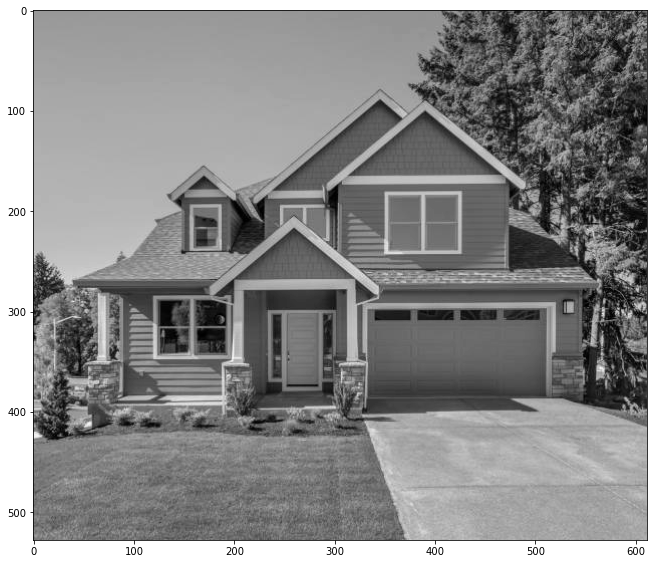

In [21]:
plt.figure(figsize=(11, 11))
plt.imshow(imgGrayCircle, cmap='gray')
plt.show()
plt.close() 

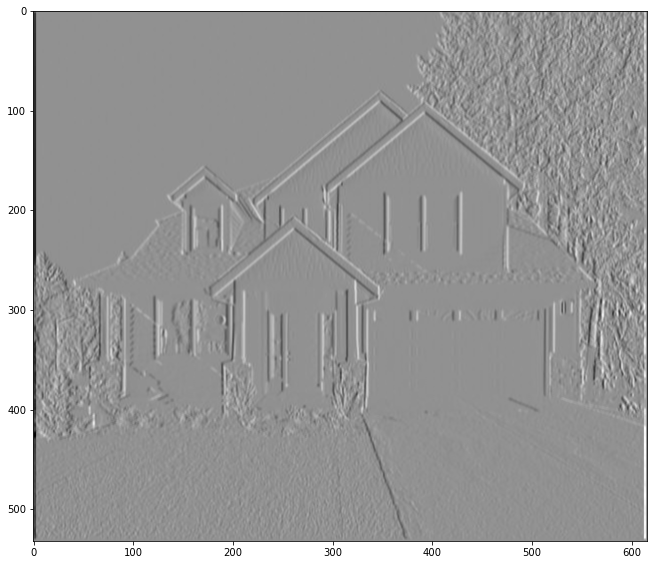

In [22]:
plt.figure(figsize=(11, 11))
plt.imshow(imgGrayCircleXDerivative, cmap='gray')
plt.show()
plt.close() 

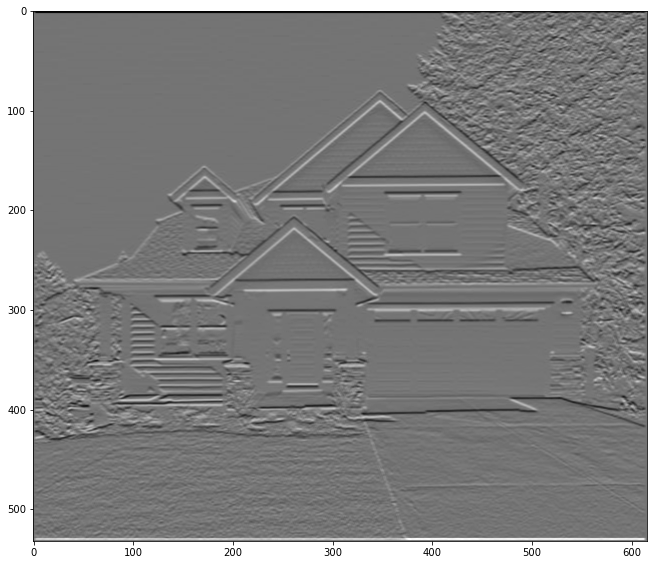

In [23]:
plt.figure(figsize=(11, 11))
plt.imshow(imgGrayCircleYDerivative, cmap='gray')
plt.show()
plt.close() 

In [24]:
def findMax2DIndex(resolution):
  location=[0,0]
  maxVal=resolution[0,0]
  for x in range(0,resolution.shape[0]):
    for y in range(0,resolution.shape[1]):
      if(resolution[x,y]>maxVal):
        maxVal=resolution[x,y]
        location=[x,y]
  return location

In [25]:
def findMin2DIndex(resolution):
  location=[0,0]
  minVal=resolution[0,0]
  for x in range(0,resolution.shape[0]):
    for y in range(0,resolution.shape[1]):
      if(resolution[x,y]<minVal):
        minVal=resolution[x,y]
        location=[x,y]
  return location

In [26]:
def findScaleDown0To255(resolution):
    [xMin,yMin]=findMin2DIndex(resolution)
    [xMax,yMax]=findMax2DIndex(resolution)
    return ((resolution-resolution[xMin,yMin])/(resolution[xMax,yMax]))*255

In [27]:
print(findMax2DIndex(imgGrayCircleXYDerivativeMagnitude))

[426, 1]


In [28]:
imgGrayCircleXYDerivativeMagnitudeScaledDownTo255=findScaleDown0To255(imgGrayCircleXYDerivativeMagnitude)

In [29]:
print(findMax2DIndex(imgGrayCircleXYDerivativeMagnitudeScaledDownTo255))

[426, 1]


In [30]:
#print(imgGrayCircleXYDerivativeMagnitudeScaledDownTo255[239,128])

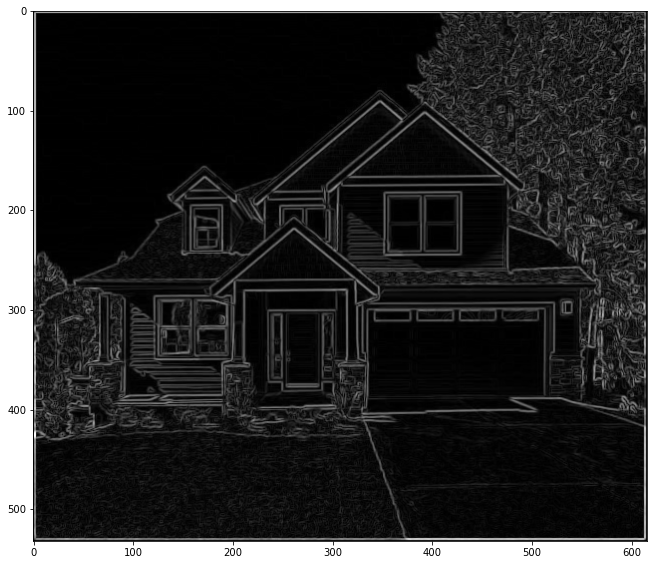

In [31]:
plt.figure(figsize=(11, 11))
plt.imshow(imgGrayCircleXYDerivativeMagnitude, cmap='gray')
plt.show()
plt.close() 

In [32]:
def findGradientDirection(imgGrayCircleXDerivative,imgGrayCircleYDerivative):
    return np.rad2deg(np.arctan2(imgGrayCircleYDerivative,imgGrayCircleXDerivative))

In [33]:
imgGrayCircleXYDerivativeDirection=findGradientDirection(imgGrayCircleXDerivative,imgGrayCircleYDerivative)

In [34]:
print(imgGrayCircleXYDerivativeDirection)

[[-135.         -131.78056554 -114.07253701 ...  -65.21072342
   -48.19866077  -45.        ]
 [-138.21943446 -135.         -116.56505118 ...  -62.79094524
   -44.96393991  -41.76556139]
 [-155.92746299 -153.43494882 -135.         ...  -43.03825205
   -25.69408153  -23.412113  ]
 ...
 [ 157.71744966  155.22112627  137.41380143 ...   44.62994311
    26.63056253   24.15152078]
 [ 138.2736555   135.05747572  116.80731855 ...   63.06399964
    44.98935128   41.78269012]
 [ 135.          131.78352526  114.14813155 ...   65.57446924
    48.20672883   45.        ]]


In [35]:
print(findMax2DIndex(imgGrayCircleXYDerivativeDirection))

[4, 0]


In [36]:
print(imgGrayCircleXYDerivativeDirection[111,267])

-94.71017669372478


In [37]:
print(imgGrayCircleXYDerivativeDirection.min())

-180.0


In [38]:
print(math.pi/2)

1.5707963267948966


In [39]:
def findNonMaximumSuppression1(imgResolutionDirection):
        imgResolutionDirectionNonMaximaSuppressed = np.zeros([imgResolutionDirection.shape[0],imgResolutionDirection.shape[1]])
        for y in range(1,imgResolutionDirection.shape[0]-1):
            for x in range(1,imgResolutionDirection.shape[1]-1):
                firstNeighbour=0
                secondNeighbour=0
                if (-22.5<=imgResolutionDirection[y,x]<22.5)or(157.5<=imgResolutionDirection[y,x]<180)or(-180<=imgResolutionDirection[y,x]<-157.5):
                    firstNeighbour=imgResolutionDirection[y,x-1]
                    secondNeighbour=imgResolutionDirection[y,x+1]
                elif (22.5<=imgResolutionDirection[y,x]<67.5)or(-157.5<=imgResolutionDirection[y,x]<=-112.5):
                    firstNeighbour=imgResolutionDirection[y+1,x+1]
                    secondNeighbour=imgResolutionDirection[y-1,x-1]
                elif (67.5<=imgResolutionDirection[y,x]<112.5)or(-112.5<=imgResolutionDirection[y,x]<=-67.5):
                    firstNeighbour=imgResolutionDirection[y+1,x]
                    secondNeighbour=imgResolutionDirection[y-1,x]
                elif (112.5<=imgResolutionDirection[y,x]<157.5)or(-67.5<=imgResolutionDirection[y,x]<=-22.5):
                    firstNeighbour=imgResolutionDirection[y+1,x-1]
                    secondNeighbour=imgResolutionDirection[y-1,x+1]
                if(imgResolutionDirection[y,x]>=firstNeighbour)and(imgResolutionDirection[y,x]>=secondNeighbour):
                    imgResolutionDirectionNonMaximaSuppressed[y,x]=imgResolutionDirection[y,x]
                else:
                    imgResolutionDirectionNonMaximaSuppressed[y,x]=0
        return imgResolutionDirectionNonMaximaSuppressed

In [40]:
def findNonMaximumSuppression2(imgResolutionDirection,MaxValueAssigned):
        discretizationRange = np.linspace(0,math.pi/2,MaxValueAssigned+2)
        imgResolutionDirectionNonMaximaSuppressed = np.zeros([imgResolutionDirection.shape[0],imgResolutionDirection.shape[1]])
        for y in range(0,imgResolutionDirection.shape[0]):
            for x in range(0,imgResolutionDirection.shape[1]):
                for index, d in enumerate(discretizationRange[1:],start=0):
                    if  (imgResolutionDirection[y,x]<=d):
                            imgResolutionDirectionNonMaximaSuppressed[y,x]=index
                            break
        return imgResolutionDirectionNonMaximaSuppressed

In [41]:
print(imgGrayCircleXYDerivativeDirection.max())

180.0


In [42]:
print(imgGrayCircleXYDerivativeDirection.shape)

(532, 616)


In [43]:
imgGrayCircleXYDerivativeDirectionNMS=findNonMaximumSuppression1((imgGrayCircleXYDerivativeDirection))

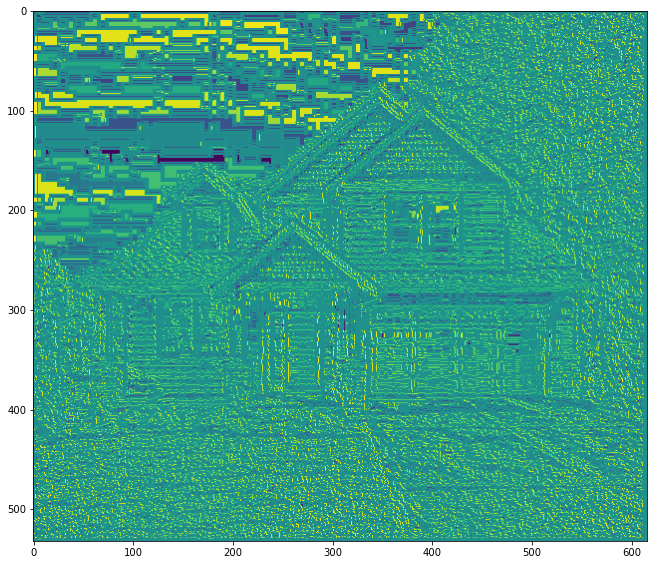

In [44]:
plt.figure(figsize=(11, 11))
plt.imshow(imgGrayCircleXYDerivativeDirectionNMS)
plt.show()
plt.close() 

In [45]:
imgGrayCircleXYDerivativeDirectionCOLOR=findNonMaximumSuppression2((np.deg2rad(imgGrayCircleXYDerivativeDirection)%math.pi),3)

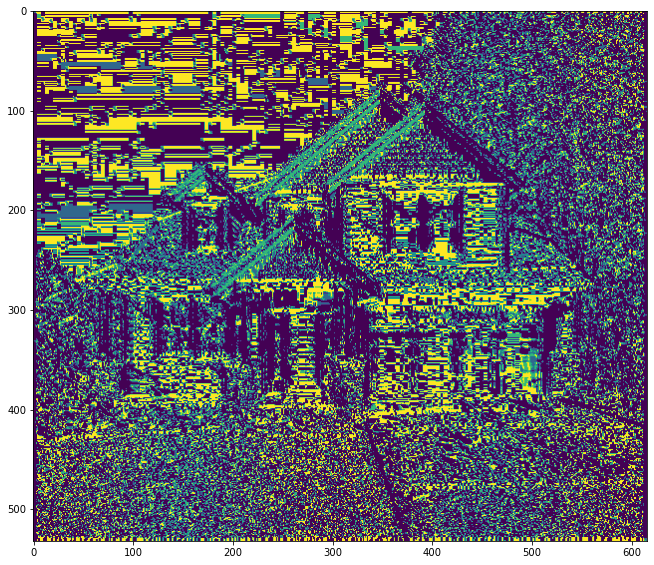

In [46]:
plt.figure(figsize=(11, 11))
plt.imshow(imgGrayCircleXYDerivativeDirectionCOLOR)
plt.show()
plt.close() 

In [47]:
print(math.pi)

3.141592653589793


In [48]:
def findHystereisThresholding(img,threholdHigh,thresholdLow):
    output=np.zeros(img.shape)
    for y in range(0,img.shape[0]):
        for x in range(0,img.shape[1]):
            if(img[y,x]<=thresholdLow):
                output[y,x]=0
            elif(img[y,x]>=threholdHigh):
                output[y,x]=255
            else:
                if(0<x<img.shape[1])and(0<y<img.shape[0]):
                    if(img[y-1:y+2,x-1:x+2].max()>=threholdHigh):
                        output[y,x]=255
                    else:
                        output[y,x]=0
                else:
                    output[y,x]=0
    return output

In [82]:
imgGrayCircleHysteresis=findHystereisThresholding(imgGrayCircleXYDerivativeDirectionNMS,170,0)

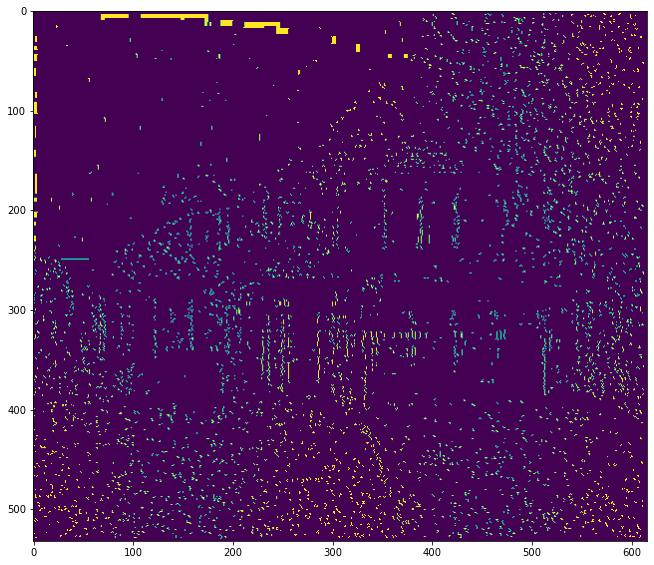

In [83]:
plt.figure(figsize=(11, 11))
plt.imshow(imgGrayCircleHysteresis)
plt.show()
plt.close() 

In [51]:
#TASK 2

In [52]:
def medianFilter(imgPatch):
    if(imgPatch.shape[0]==imgPatch.shape[1]):
        temp=imgPatch.flatten()
        temp.sort()
        return temp[int(temp.shape[0]/2)]
    else:
        print("Please give a square image patch")
    return

In [53]:
def findMedian2D(N,imgTarget):
    if (imgTarget.shape[0]-N>-1)and(imgTarget.shape[1]-N>-1):
        output=np.zeros([imgTarget.shape[0]+N-1,imgTarget.shape[1]+N-1])
        temp=np.zeros([imgTarget.shape[0]+2*N-2,imgTarget.shape[1]+2*N-2])
        temp[N-1:imgTarget.shape[0]+N-1,N-1:imgTarget.shape[1]+N-1]=imgTarget
        for y in range(0,output.shape[0]):
            for x in range(0,output.shape[1]):
                output[y,x]=medianFilter(temp[y:y+N,x:x+N])
        return output
    else:
        print("Target image dimension is less than the target image dimension")
        return

In [54]:
imgGrayCircleMedianFiltered=findMedian2D(3,imgGrayCircle)

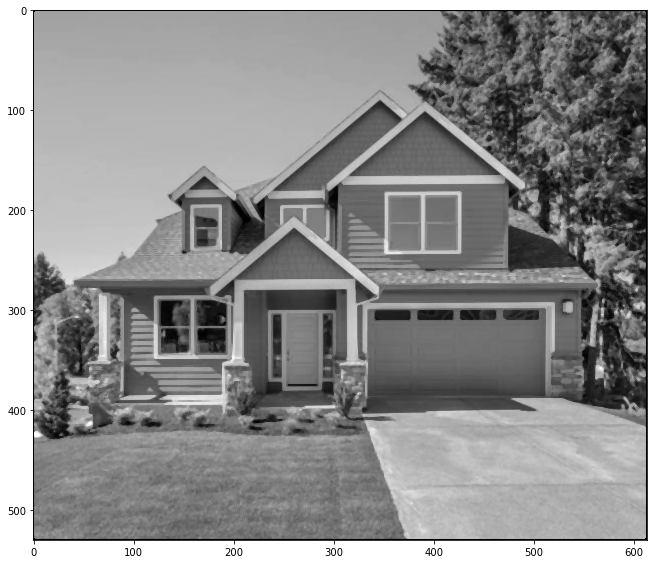

In [55]:
plt.figure(figsize=(11, 11))
plt.imshow(imgGrayCircleMedianFiltered, cmap='gray')
plt.show()
plt.close() 

In [56]:
imgGrayCircleMedianFiltered=findMedian2D(5,imgGrayCircle)

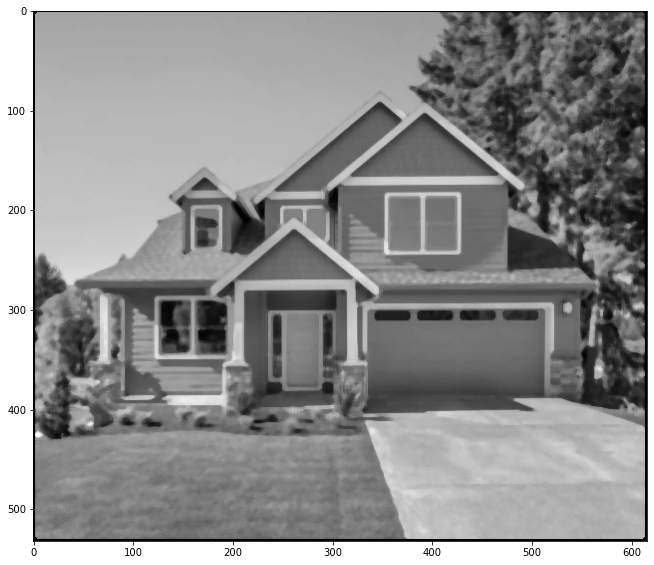

In [57]:
plt.figure(figsize=(11, 11))
plt.imshow(imgGrayCircleMedianFiltered, cmap='gray')
plt.show()
plt.close() 

In [58]:
imgGrayCircleMedianFiltered=findMedian2D(7,imgGrayCircle)

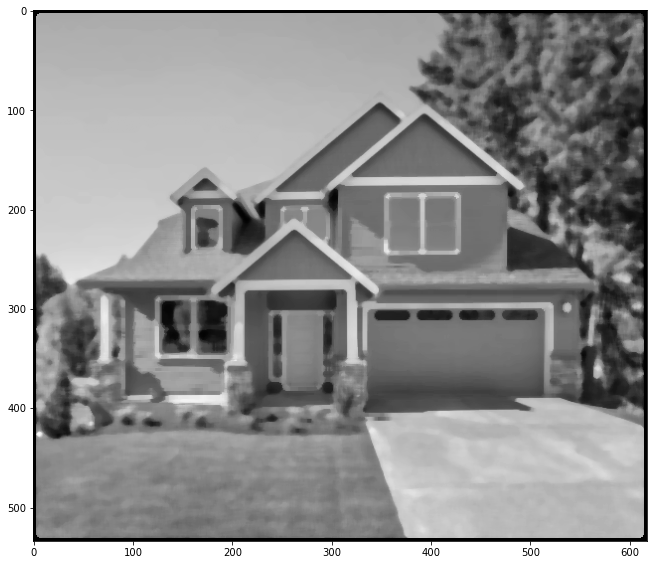

In [59]:
plt.figure(figsize=(11, 11))
plt.imshow(imgGrayCircleMedianFiltered, cmap='gray')
plt.show()
plt.close() 